In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from VNP43NRT import VNP43NRT

In [2]:
import os
os.getenv("PATH")

'/opt/homebrew/Caskroom/mambaforge/base/bin:/opt/homebrew/Caskroom/mambaforge/base/condabin:/Users/halverso/scripts:/Users/halverso/miniforge-pypy3/condabin:/Users/halverso/miniforge-pypy3/bin:/Users/halverso/mambaforge/condabin:/Users/halverso/mambaforge/bin:/opt/homebrew/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/TeX/texbin'

In [3]:
VNP43NRT_C1 = VNP43NRT(working_directory="~/data/VNP43NRT_C1_testing", collection=1)
VNP43NRT_C1

[2024-06-07 15:56:50 INFO] GEOS-5 FP working directory: /Users/halverso/data/VNP43NRT_C1_testing
[2024-06-07 15:56:50 INFO] GEOS-5 FP download directory: /Users/halverso/data/VNP43NRT_C1_testing/GEOS5FP_download
[2024-06-07 15:56:50 INFO] GEOS-5 FP products directory: /Users/halverso/data/VNP43NRT_C1_testing/GEOS5FP_products


{
  "collection": 1,
  "download_directory": "/Users/halverso/data/VNP43NRT_C1_testing/VNP09GA_download",
  "VNP09GA_directory": "/Users/halverso/data/VNP43NRT_C1_testing/VNP09GA_products",
  "VNP43NRT_directory": "/Users/halverso/data/VNP43NRT_C1_testing/VNP43NRT_products",
  "mosaic_directory": "/Users/halverso/data/VNP43NRT_C1_testing/VNP09GA_mosaics"
}

In [4]:
VNP43NRT_C2 = VNP43NRT(working_directory="~/data/VNP43NRT_C2_testing", collection=2)
VNP43NRT_C2

[2024-06-07 15:56:50 INFO] GEOS-5 FP working directory: /Users/halverso/data/VNP43NRT_C2_testing
[2024-06-07 15:56:50 INFO] GEOS-5 FP download directory: /Users/halverso/data/VNP43NRT_C2_testing/GEOS5FP_download
[2024-06-07 15:56:50 INFO] GEOS-5 FP products directory: /Users/halverso/data/VNP43NRT_C2_testing/GEOS5FP_products


{
  "collection": 2,
  "download_directory": "/Users/halverso/data/VNP43NRT_C2_testing/VNP09GA_download",
  "VNP09GA_directory": "/Users/halverso/data/VNP43NRT_C2_testing/VNP09GA_products",
  "VNP43NRT_directory": "/Users/halverso/data/VNP43NRT_C2_testing/VNP43NRT_products",
  "mosaic_directory": "/Users/halverso/data/VNP43NRT_C2_testing/VNP09GA_mosaics"
}

In [5]:
VNP43NRT_C2_granule = VNP43NRT_C2.granule("2024-02-14", "h08v05")
VNP43NRT_C2_granule

[2024-06-07 15:56:50 INFO] started processing VNP43NRT at h08v05 on 2024-02-14


VNP43NRTGranule(/Users/halverso/data/VNP43NRT_C2_testing/VNP43NRT_products/VNP43NRT_A2024045_h08v05)

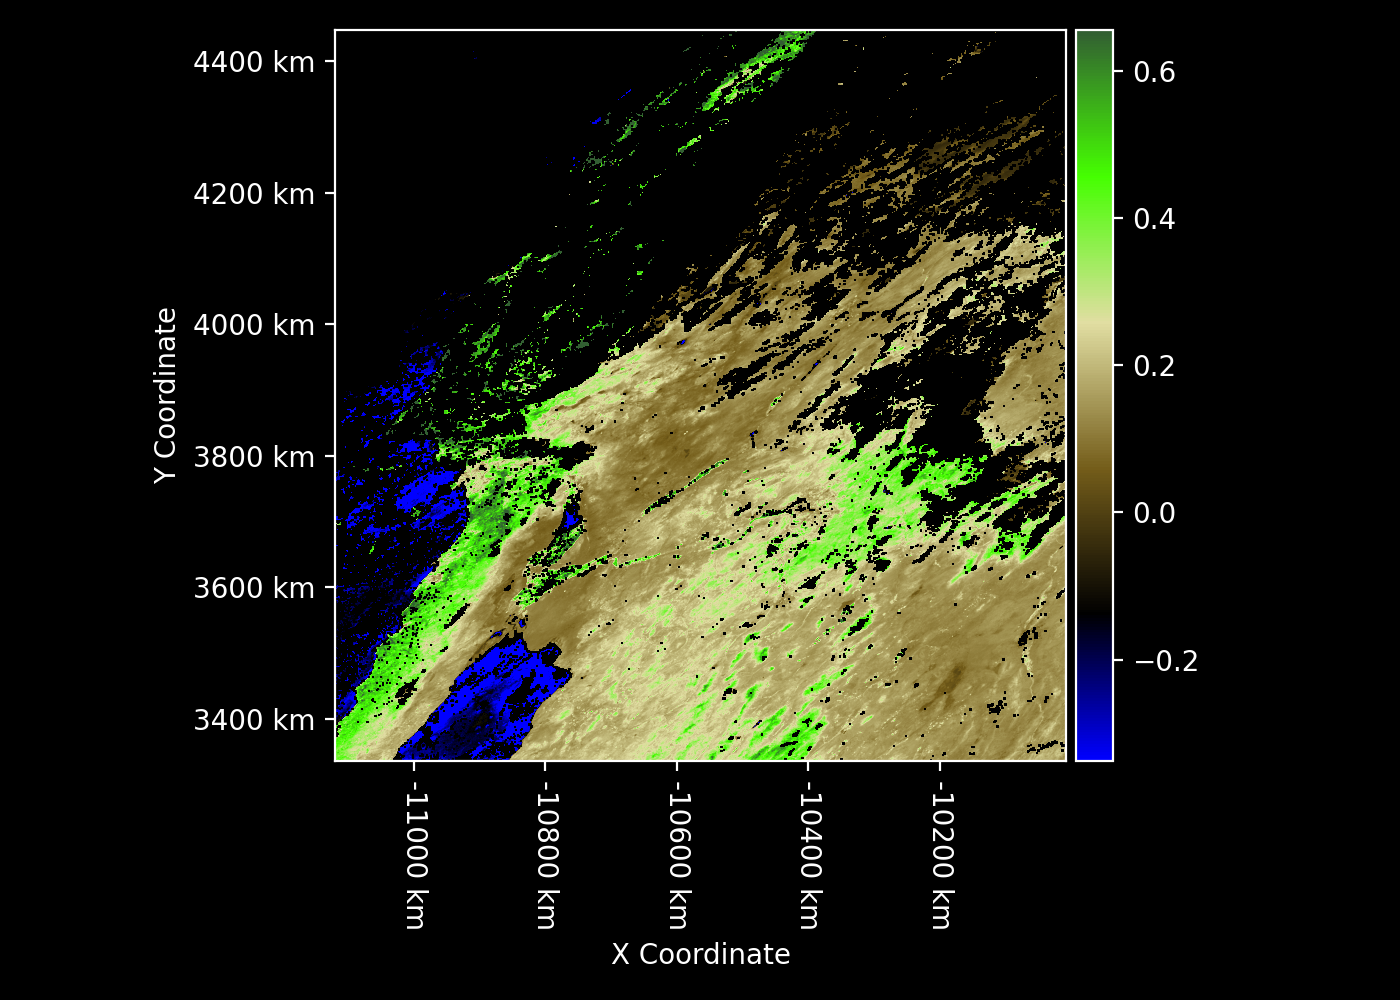

In [6]:
C2_NDVI = VNP43NRT_C2_granule.NDVI
C2_NDVI

In [7]:
VNP43NRT_C1_granule = VNP43NRT_C1.granule("2024-02-14", "h08v05")
VNP43NRT_C1_granule

[2024-06-07 15:56:50 INFO] started processing VNP43NRT at h08v05 on 2024-02-14


VNP43NRTGranule(/Users/halverso/data/VNP43NRT_C1_testing/VNP43NRT_products/VNP43NRT_A2024045_h08v05)

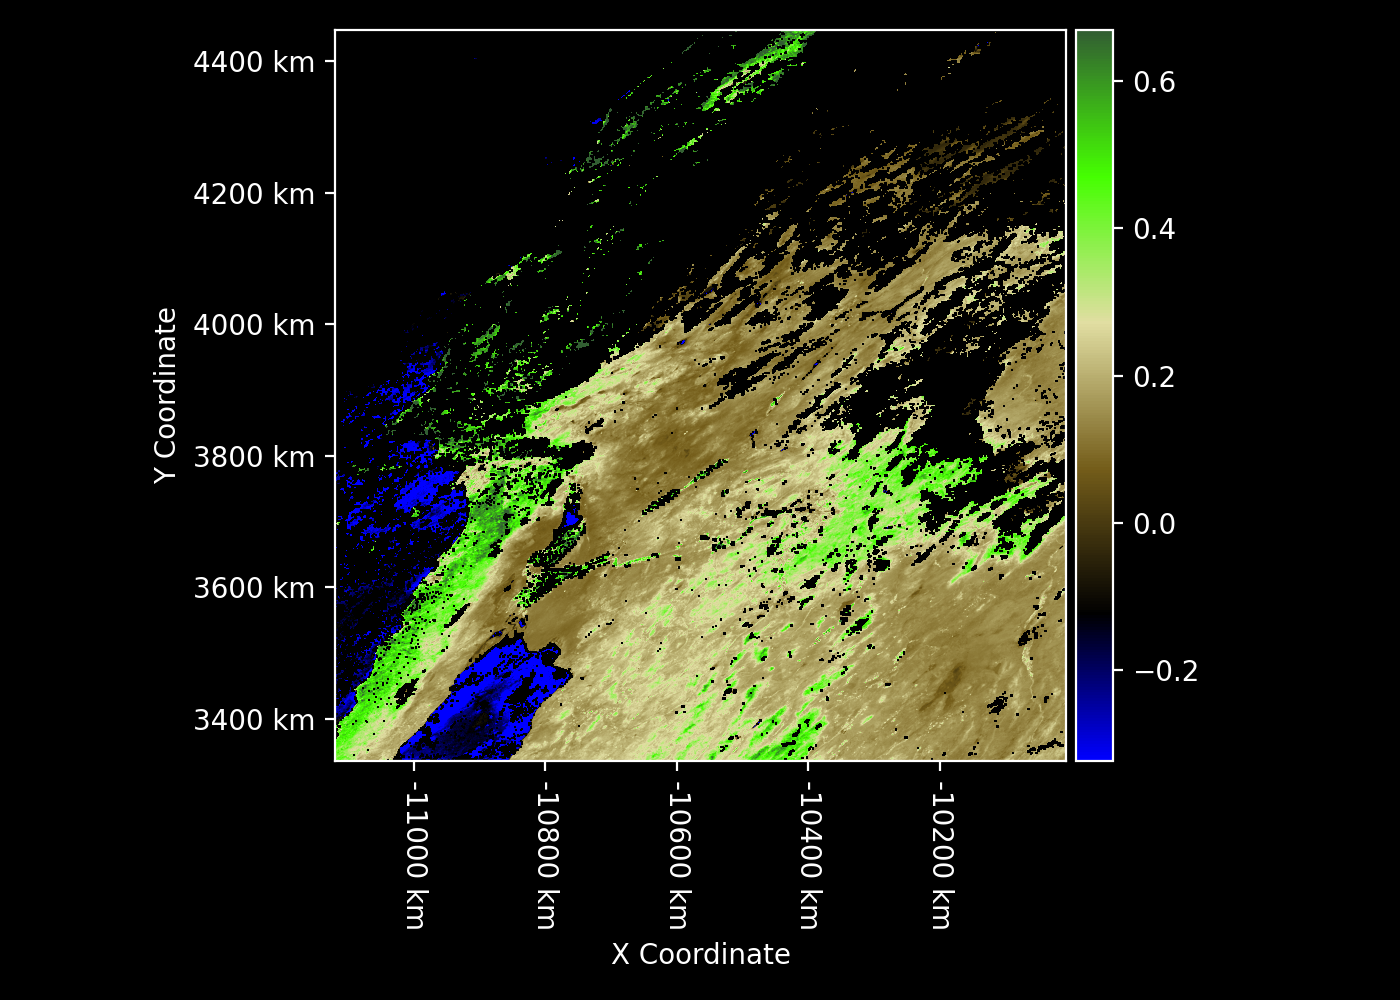

In [8]:
C1_NDVI = VNP43NRT_C1_granule.NDVI
C1_NDVI

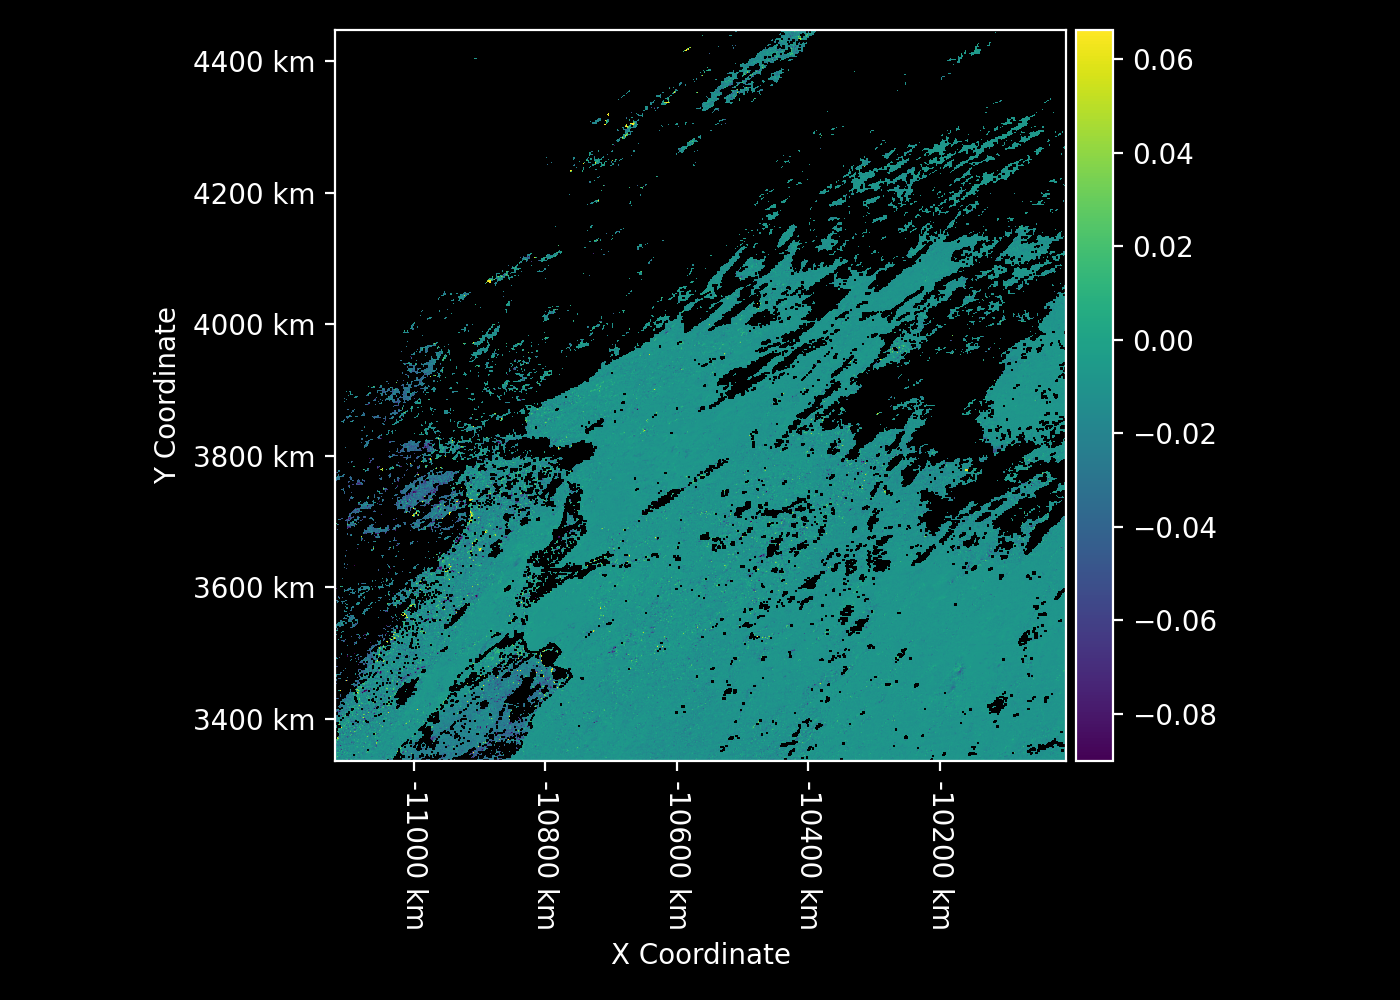

In [9]:
NDVI_diff = C2_NDVI - C1_NDVI
NDVI_diff.cmap = "viridis"
NDVI_diff

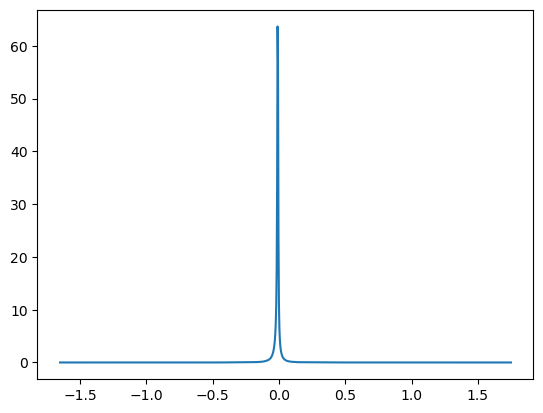

In [10]:
values = np.array(NDVI_diff).flatten()
values = values[~np.isnan(values)]
x = np.linspace(np.min(values), np.max(values), 1000)
density = gaussian_kde(values)
y = density(x)
plt.plot(x, y)
plt.show()

In [11]:
np.nanmean(NDVI_diff)

-0.011903018

In [12]:
np.nanmedian(NDVI_diff)

-0.009750158